# PDE constraint

In [1]:
# This is only valid when the package is not installed
import sys
sys.path.append('../../') # two folders up

In [2]:
import DeepINN as dp

Using default backend: PyTorch
Using Pytorch:  2.0.1+cu117


In [3]:
# Let us make a simple rectangle
X = dp.spaces.R2('x') #  2D space stencil
R = dp.domains.Parallelogram(X, [0,0], [1,0], [0,1])

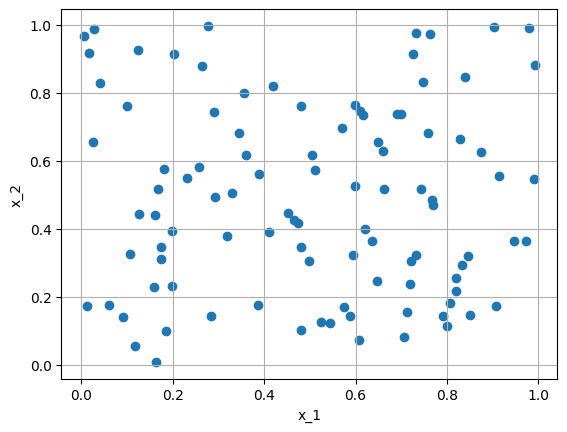

In [4]:
collocation_points = dp.samplers.RandomUniformSampler(R, n_points = 100)
dp.utils.scatter(X, collocation_points)

In [5]:
# sample collcocation points
collocation_points = dp.constraint.PDE(geom = R,
                                       sampling_strategy= "random",
                                       no_points = 100)

In [6]:
collocation_points_sampled = collocation_points.sampler_object().sample_points().as_tensor
collocation_points_sampled.size()

torch.Size([100, 2])

In [7]:
collocation_points_labels = collocation_points.sample_labels(collocation_points_sampled).unsqueeze(1)
collocation_points_labels.size()

torch.Size([100, 1])

In [8]:
import matplotlib.pyplot as plt

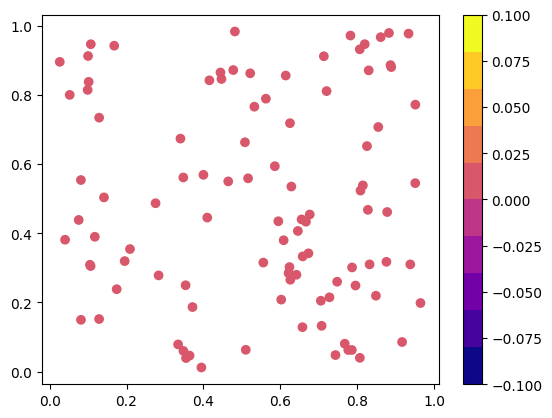

In [9]:
# The variation in BCs based on the provided function : lambda X: X[:,0]**2
plt.scatter(collocation_points_sampled[:,0], collocation_points_sampled[:,1], c = collocation_points_labels, cmap=plt.get_cmap('plasma',10))
plt.colorbar()